In [154]:
import pandas as pd

READING THE DATASET

In [155]:
data = pd.read_csv('kohli_results.csv',engine = 'python')

In [156]:
data.shape

(438, 8)

In [157]:
data.head()

,Unnamed: 0,Runs,BF,SR,4s,6s,Opposition,Result
0,0,12,22,54.54,1,0,ODI v�Sri Lanka,lost
1,1,37,67,55.22,6,0,ODI v�Sri Lanka,won
2,2,25,38,65.78,4,0,ODI v�Sri Lanka,won
3,3,54,66,81.81,7,0,ODI v�Sri Lanka,won
4,4,31,46,67.39,3,1,ODI v�Sri Lanka,lost


In [158]:
data = data.drop(['Unnamed: 0'],axis = 1)

**PRE PROCESSING AND DATA CLEANING**

In [159]:
data['Opposition'] = data['Opposition'].str.replace('[^\w\s]','')


In [160]:
data.head()

,Runs,BF,SR,4s,6s,Opposition,Result
0,12,22,54.54,1,0,ODI vSri Lanka,lost
1,37,67,55.22,6,0,ODI vSri Lanka,won
2,25,38,65.78,4,0,ODI vSri Lanka,won
3,54,66,81.81,7,0,ODI vSri Lanka,won
4,31,46,67.39,3,1,ODI vSri Lanka,lost


In [161]:
data['format'] =list(data['Opposition'].str.split(' v'))
data['against'] =list(data['Opposition'].str.split(' v'))

In [162]:
data['format'] =data['format'].str[0]
data['against'] =data['against'].str[1]

data = data.drop(['Opposition'],axis = 1)

In [163]:
data.head()

,Runs,BF,SR,4s,6s,Result,format,against
0,12,22,54.54,1,0,lost,ODI,Sri Lanka
1,37,67,55.22,6,0,won,ODI,Sri Lanka
2,25,38,65.78,4,0,won,ODI,Sri Lanka
3,54,66,81.81,7,0,won,ODI,Sri Lanka
4,31,46,67.39,3,1,lost,ODI,Sri Lanka


In [164]:
df = data.copy()

**Encoding the categorical values**

In [165]:
df = pd.get_dummies(df,columns = ['format','against'])

In [166]:
df

,Runs,BF,SR,4s,6s,Result,format_ODI,format_T20I,format_Test,against_Afghanistan,against_Australia,against_Bangladesh,against_England,against_Ireland,against_Netherlands,against_New Zealand,against_Pakistan,against_South Africa,against_Sri Lanka,against_UAE,against_West Indies,against_Zimbabwe
0,12,22,54.54,1,0,lost,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,37,67,55.22,6,0,won,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,25,38,65.78,4,0,won,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,54,66,81.81,7,0,won,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,31,46,67.39,3,1,lost,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,66,79,83.54,3,1,lost,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
434,7,10,70,1,0,won,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
435,57,161,35.4,1,0,lost,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
436,0,1,0,0,0,draw,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [167]:
df.shape

(438, 22)

**Removing the invalid rows**

In [168]:
df['SR'].unique()

array(['54.54', '55.22', '65.78', '81.81', '67.39', '100', '66.66', '-',
       '75.96', '73.17', '62.5', '142.1', '83.07', '93.85', '75', '89.21',
       '104.41', '107.36', '25', '80.28', '89.13', '62.06', '71.57',
       '123.8', '50', '71.42', '82.35', '0', '64.91', '97.52', '100.96',
       '87.67', '90', '147.36', '77.14', '64.7', '68.29', '94.56',
       '33.33', '120.48', '160', '64.15', '60', '77.63', '72.72', '42.85',
       '116.66', '78.64', '90.38', '29.68', '24.77', '56.6', '80',
       '75.34', '38.88', '44.44', '115.05', '58.73', '114.28', '86.86',
       '93.75', '51.11', '95.12', '209.09', '94.11', '49.23', '54.83',
       '50.18', '104.76', '129.16', '91.17', '81.91', '64.28', '48',
       '79.51', '77.77', '154.65', '80.48', '123.64', '93.8', '20',
       '58.46', '107.56', '65.71', '141.66', '54.2', '56', '170.73',
       '128.2', '125', '115.38', '127.86', '37.5', '38.23', '30.95',
       '34.91', '123.52', '190', '122.72', '41.17', '68.18', '68.51',
       '97.46

In [169]:
df = df[df['SR']!='-']

In [170]:
df.shape

(420, 22)

**Encoding the target variable**

In [171]:
df['Result'].value_counts()

won     251
lost    142
draw     17
tied      7
n/r       3
Name: Result, dtype: int64

In [172]:
df = df[df['Result'] != 'tied']
df = df[df['Result'] != 'n/r']
df = df[df['Result'] != 'draw']

In [173]:
df.shape

(393, 22)

In [174]:
df.loc[df['Result'] == 'lost', 'Result'] = 0
df.loc[df['Result'] == 'won', 'Result'] = 1

In [175]:
df['Result'].value_counts()

1    251
0    142
Name: Result, dtype: int64

In [176]:
dff = df.pop('Result')
df['Result'] = dff

In [177]:
df.head()

,Runs,BF,SR,4s,6s,format_ODI,format_T20I,format_Test,against_Afghanistan,against_Australia,against_Bangladesh,against_England,against_Ireland,against_Netherlands,against_New Zealand,against_Pakistan,against_South Africa,against_Sri Lanka,against_UAE,against_West Indies,against_Zimbabwe,Result
0,12,22,54.54,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,37,67,55.22,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,25,38,65.78,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,54,66,81.81,7,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,31,46,67.39,3,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [178]:
df.shape

(393, 22)

**Scaling Data and splitting into train and test**

In [179]:
X = df.iloc[:,:21]
y = df['Result']

In [180]:
y=y.astype('int')

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler( )
scaler.fit(X_train)
X_train = scaler.transform(X_train)

**Creating our Win or Lose Classifier**

In [183]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()


**Fitting the Classifier to the Data**

In [184]:
# training the model
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Predicting Results**

In [185]:
y_pred = clf.predict(scaler.transform(X_test))


Checking Goodness/ Correctness of Model

In [186]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 67.09%


In [187]:
y_test.value_counts()

1    47
0    32
Name: Result, dtype: int64

In [188]:
47/79 * 100

59.49367088607595

Text(0.5, 1.0, 'Confusion Matrix')

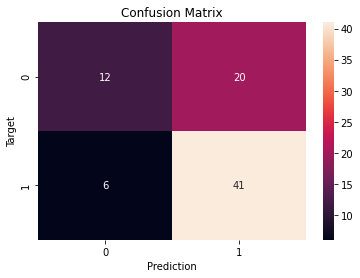

In [189]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [131]:
from sklearn.metrics import f1_score 

In [132]:
f1_score(y_test,y_pred)

0.7592592592592592